## 绘图准备函数

In [2]:
def linestyle_generator():
    """
    生成绘图用的线型
    """
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID=(lineID + 1) % len(linestyle)


def plot_set(fig_ax,*args):
    """
    设置绘图的样式
    """
    fig_ax.set_xlabel(args[0]) #x轴标签
    fig_ax.set_ylabel(args[1]) #y轴标签
    fig_ax.grid(ls=':') # 
    if len(args)==3:
        fig_ax.legend(loc=args[2]) # 图例位置


# 波特图  伯德图  就是频率的对数图像
def bodeplot_set(fig_ax, *args):
    """
    设置bode图的样式
    """
    fig_ax[0].grid(which='both', ls=':') # 网格线
    fig_ax[0].set_ylabel('Gain [dB]') # y轴标签 # 幅值

    fig_ax[1].grid(which='both', ls=':') # 网格线
    fig_ax[1].set_xlabel('Frequency: $\omega$ [rad/s]') # x轴标签   # 频率
    fig_ax[1].set_ylabel('Phase [deg]') # 相位

    if  len(args) > 0:
        fig_ax[1].legend(loc=args[0]) # 图例位置 # 参数个数大于1 显示频幅图
    if  len(args) > 1:
        fig_ax[0].legend(loc=args[1]) # 图例位置 # 参数个数大于2 同时显示相位频率图
     

## PID

### 构建系统

In [13]:
import matplotlib.pyplot as plt
# import control as ctrl
import numpy as np  
import control.matlab as ctrl_matlab

g = 9.81 
l=0.2
M=0.5
mu=1.5e-2
J=1.0e-2

P = ctrl_matlab.tf([0,1],[J,mu,M*g*l])

ref=30

kp=(0.5,1,2)
kd=(0,0.1,0.2)

### 采用P时域图

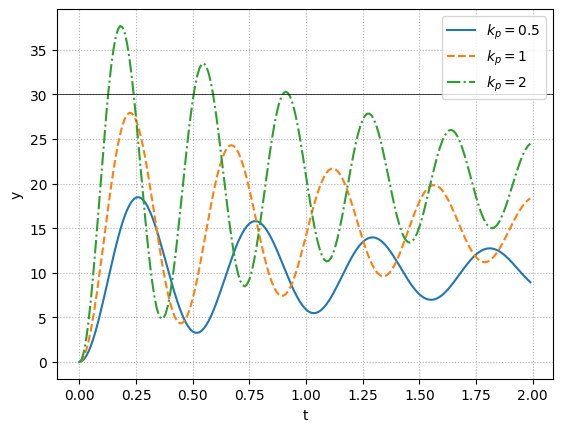

In [ ]:

LS=linestyle_generator()
fig, ax = plt.subplots()

for i in range(len(kp)):
    K=ctrl_matlab.tf([0,kp[i]],[0,1])
    Gyr=ctrl_matlab.feedback(P*K,1)
    y,t=ctrl_matlab.step(Gyr,np.arange(0,2,0.01))

    pltargs = {'ls':next(LS), 'label':f'$k_p={kp[i]}$'}
    ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,  color='k' ,linewidth=0.5)
plot_set(ax,'t','y','best')



### 采用P频域图

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


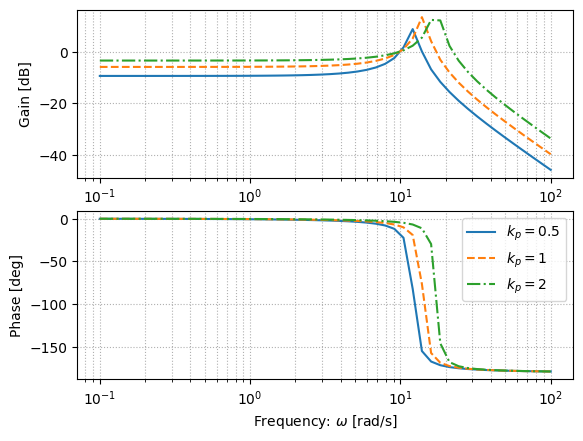

In [12]:

LS=linestyle_generator()
fig, ax = plt.subplots(2,1)

for i in range(len(kp)):
    K=ctrl_matlab.tf([0,kp[i]],[0,1]) #比例因子P控制
    Gyr=ctrl_matlab.feedback(P*K,1) #闭环系统

    gain,phase,w = ctrl_matlab.bode(Gyr,ctrl_matlab.logspace(-1,2),Plot=False)

    pltargs = {'ls':next(LS), 'label':f'$k_p={kp[i]}$'}
    ax[0].semilogx(w,20*np.log10(gain),**pltargs)
    ax[1].semilogx(w,phase*180/np.pi,**pltargs)

bodeplot_set(ax,'best' )

### 采用PD时域图

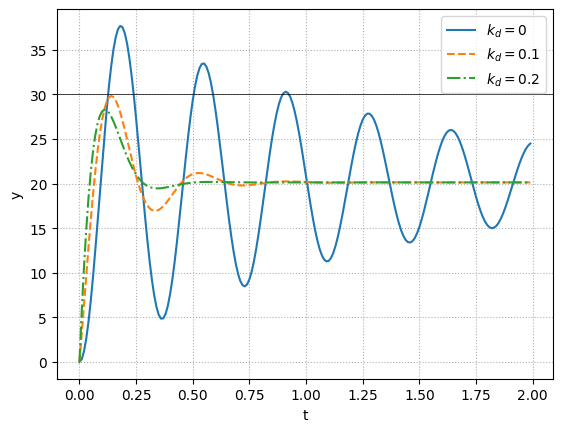

In [ ]:
kpx =2

LS=linestyle_generator()
fig, ax = plt.subplots()

for i in range(len(kd)):
    K=ctrl_matlab.tf([kd[i],kpx],[0,1])
    Gyr=ctrl_matlab.feedback(P*K,1)
    y,t=ctrl_matlab.step(Gyr,np.arange(0,2,0.01))

    pltargs = {'ls':next(LS), 'label':f'$k_d={kd[i]}$'}
    ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,  color='k' ,linewidth=0.5)
plot_set(ax,'t','y','best')




### 采用PD频域图

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


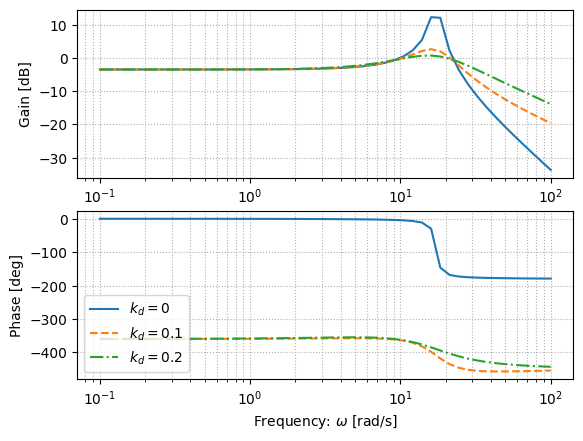

In [23]:
kpx=2

LS=linestyle_generator()
fig, ax = plt.subplots(2,1)

for i in range(len(kd)):
    K=ctrl_matlab.tf([kd[i],kpx],[0,1]) #比例因子P控制
    Gyr=ctrl_matlab.feedback(P*K,1) #闭环系统

    gain,phase,w = ctrl_matlab.bode(Gyr,ctrl_matlab.logspace(-1,2),Plot=False)

    pltargs = {'ls':next(LS), 'label':f'$k_d={kd[i]}$'}
    ax[0].semilogx(w,20*np.log10(gain),**pltargs)
    ax[1].semilogx(w,phase*180/np.pi,**pltargs)

bodeplot_set(ax,'lower left' )

### 采用PID时域图

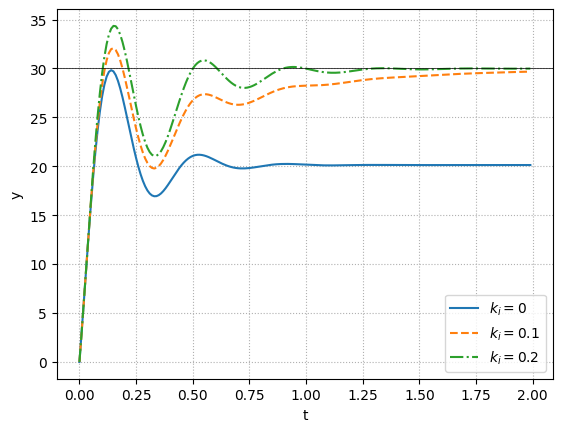

In [28]:
kpx =2
kdx =0.1
ki=(0,5,10)

LS=linestyle_generator()
fig, ax = plt.subplots()

for i in range(len(ki)):
    K=ctrl_matlab.tf([kdx,kpx,ki[i]],[1,0])
    Gyr=ctrl_matlab.feedback(P*K,1)
    y,t=ctrl_matlab.step(Gyr,np.arange(0,2,0.01))

    pltargs = {'ls':next(LS), 'label':f'$k_i={kd[i]}$'}
    ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,  color='k' ,linewidth=0.5)
plot_set(ax,'t','y','best')
 


### 采用PID频域图

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


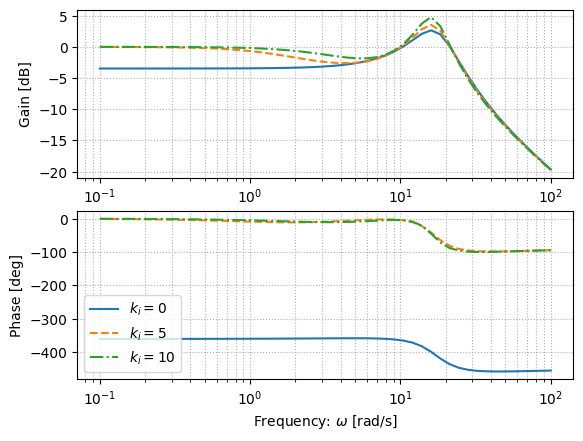

In [29]:
kpx =2
kdx =0.1
ki=(0,5,10)

LS=linestyle_generator()
fig, ax = plt.subplots(2,1)

for i in range(len(kd)):
    K=ctrl_matlab.tf([kdx,kpx,ki[i]],[1,0]) #比例因子P控制
    Gyr=ctrl_matlab.feedback(P*K,1) #闭环系统

    gain,phase,w = ctrl_matlab.bode(Gyr,ctrl_matlab.logspace(-1,2),Plot=False)

    pltargs = {'ls':next(LS), 'label':f'$k_i={ki[i]}$'}
    ax[0].semilogx(w,20*np.log10(gain),**pltargs)
    ax[1].semilogx(w,phase*180/np.pi,**pltargs)

bodeplot_set(ax,'lower left' )

### PID扰动时域响应

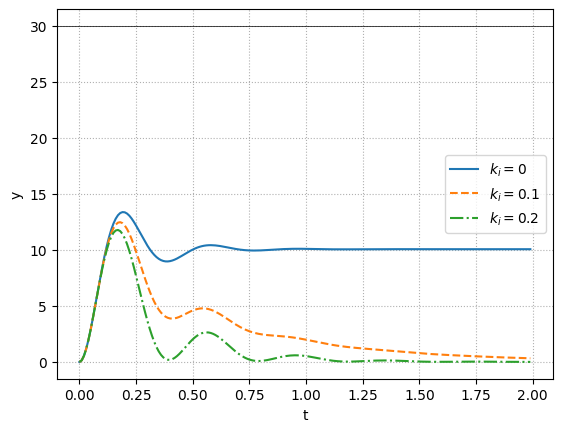

In [30]:
kpx =2
kdx =0.1
ki=(0,5,10)

LS=linestyle_generator()
fig, ax = plt.subplots()

for i in range(len(ki)):
    K=ctrl_matlab.tf([kdx,kpx,ki[i]],[1,0])
    Gyr=ctrl_matlab.feedback(P,K)
    y,t=ctrl_matlab.step(Gyr,np.arange(0,2,0.01))

    pltargs = {'ls':next(LS), 'label':f'$k_i={kd[i]}$'}
    ax.plot(t,y*ref,**pltargs)

ax.axhline(ref,  color='k' ,linewidth=0.5)
plot_set(ax,'t','y','best')
 


### PID扰动频域响应

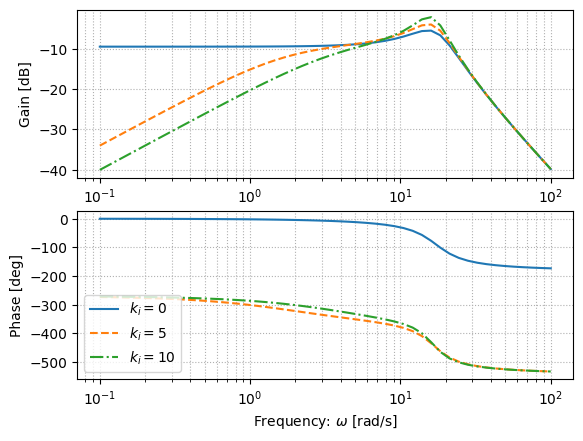

In [31]:
kpx =2
kdx =0.1
ki=(0,5,10)

LS=linestyle_generator()
fig, ax = plt.subplots(2,1)

for i in range(len(kd)):
    K=ctrl_matlab.tf([kdx,kpx,ki[i]],[1,0]) #比例因子P控制
    Gyr=ctrl_matlab.feedback(P ,K) #闭环系统

    gain,phase,w = ctrl_matlab.bode(Gyr,ctrl_matlab.logspace(-1,2),Plot=False)

    pltargs = {'ls':next(LS), 'label':f'$k_i={ki[i]}$'}
    ax[0].semilogx(w,20*np.log10(gain),**pltargs)
    ax[1].semilogx(w,phase*180/np.pi,**pltargs)

bodeplot_set(ax,'lower left' )

## 改进二自由度PID控制

d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


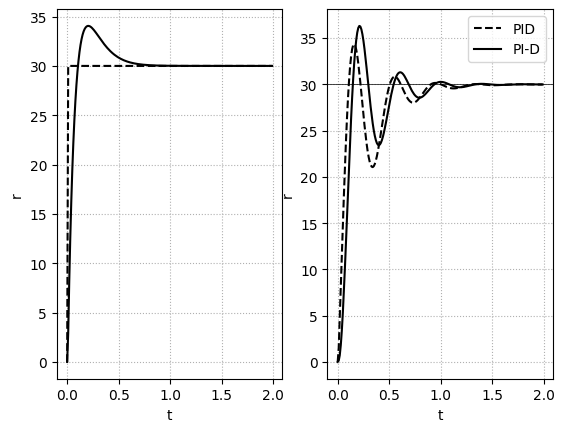

In [53]:
kp=2 
ki=10
kd=0.1

ref=30

K1 = ctrl_matlab.tf([kd,kp,ki],[1,0])
K2 = ctrl_matlab.tf([kp,ki],[kd,kp,ki])

#z y 传递函数
Gyz = ctrl_matlab.feedback(P*K1,1)

Td = np.arange(0,2,0.01)
r=1*(Td>0)

#用K2对目标r做整形
z,t,_=ctrl_matlab.lsim(K2,r,Td,0)
fig ,ax = plt.subplots(1,2)

#PID控制 z=r
y,_,_=ctrl_matlab.lsim(Gyz,r,Td,0)
ax[0].plot(t,r*ref,ls='--',color ='k')
ax[1].plot(t,y*ref,ls='--',label='PID',color ='k')
#PI-D控制  
y,_,_=ctrl_matlab.lsim(Gyz,z,Td,0)
ax[0].plot(t,z*ref,color ='k')
ax[1].plot(t,y*ref,label='PI-D',color ='k')
 
ax[1].axhline(ref,color='k',linewidth=0.5)
plot_set(ax[0],'t','r' )
plot_set(ax[1],'t','r','best')


d:\_PRO\_DEVELOPER\Miniconda3\envs\learn_env\lib\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


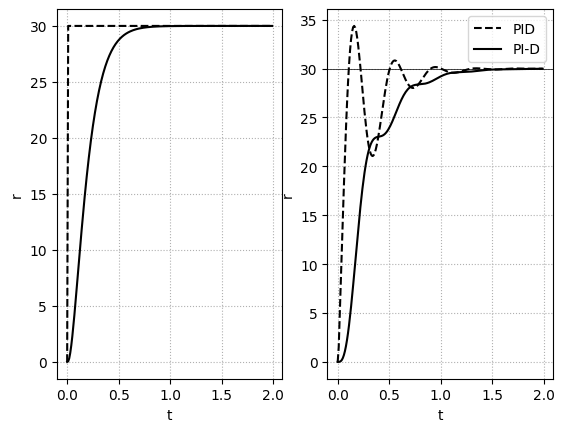

In [52]:
kp=2 
ki=10
kd=0.1

ref=30

K1 = ctrl_matlab.tf([kd,kp,ki],[1,0])
K2 = ctrl_matlab.tf([kp,ki],[kd,kp,ki])
K3= ctrl_matlab.tf([0,ki],[kd,kp,ki])

#z y 传递函数
Gyz = ctrl_matlab.feedback(P*K1,1)

Td = np.arange(0,2,0.01)
r=1*(Td>0)

#用K2对目标r做整形
z,t,_=ctrl_matlab.lsim(K3,r,Td,0)
fig ,ax = plt.subplots(1,2)

#PID控制 z=r
y,_,_=ctrl_matlab.lsim(Gyz,r,Td,0)
ax[0].plot(t,r*ref,ls='--',color ='k')
ax[1].plot(t,y*ref,ls='--',label='PID',color ='k')
#PI-D控制  
y,_,_=ctrl_matlab.lsim(Gyz,z,Td,0)
ax[0].plot(t,z*ref,color ='k')
ax[1].plot(t,y*ref,label='PI-D',color ='k')
 
ax[1].axhline(ref,color='k',linewidth=0.5)
plot_set(ax[0],'t','r' )
plot_set(ax[1],'t','r','best')
